In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt
import utils

In [2]:
names_df = pd.read_csv("data/IMDb names.csv")

In [3]:
names_df.head(5)

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [4]:
utils.get_stats_df(names_df)

,mean,std,min,25%,50%,75%,max
height,175.007162,14.055496,20.0,168.0,175.0,183.0,990.0
spouses,0.208690,0.570208,0.0,0.0,0.0,0.0,12.0
divorces,0.071722,0.348499,0.0,0.0,0.0,0.0,12.0
spouses_with_children,0.104866,0.349762,0.0,0.0,0.0,0.0,6.0
children,0.196439,0.721257,0.0,0.0,0.0,0.0,16.0


/Users/airenay/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-qi4xOFlq-py3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/airenay/Library/Caches/pypoetry/virtualenvs/data-analysis-2021-qi4xOFlq-py3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/airenay/Library/Caches/pypoetry/virtualenvs/data-

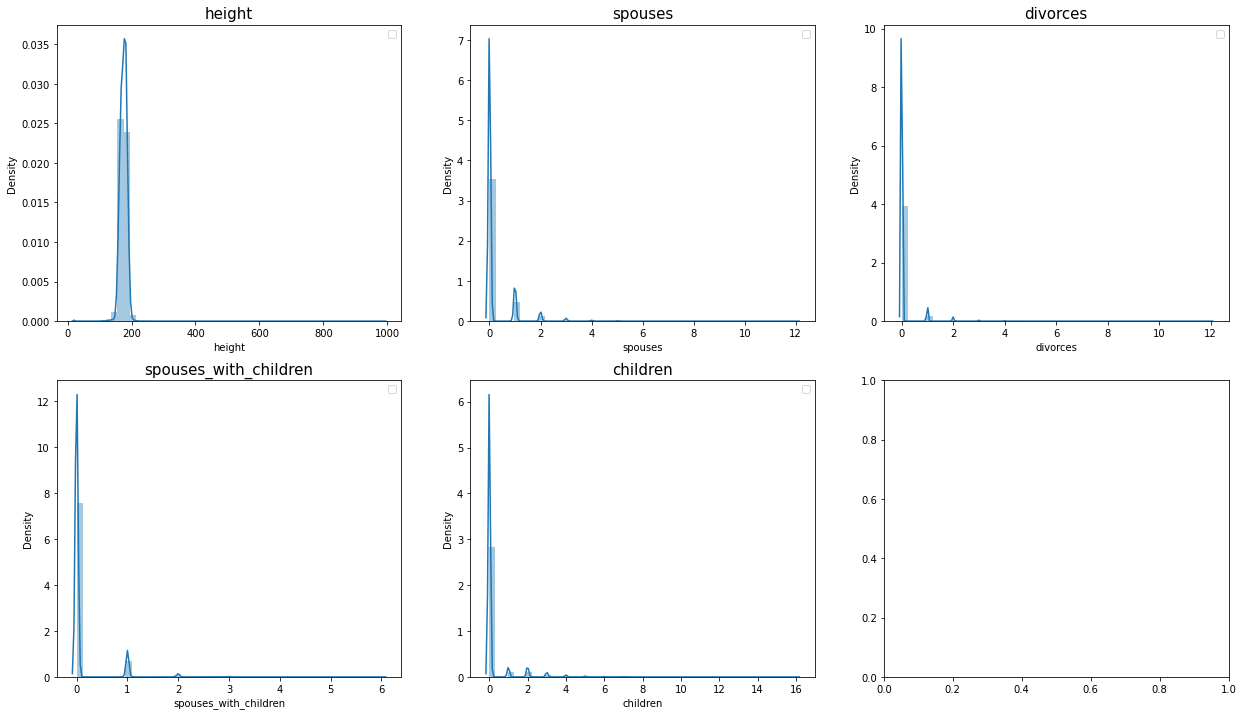

In [5]:
numerical_data = ["height", "spouses", "divorces", "spouses_with_children", "children"]
utils.plot_distplot_matrix(names_df, numerical_data)

In [6]:
df_filtered = names_df[(names_df["height"] < 251.0) & (names_df["height"] > 55.0)]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


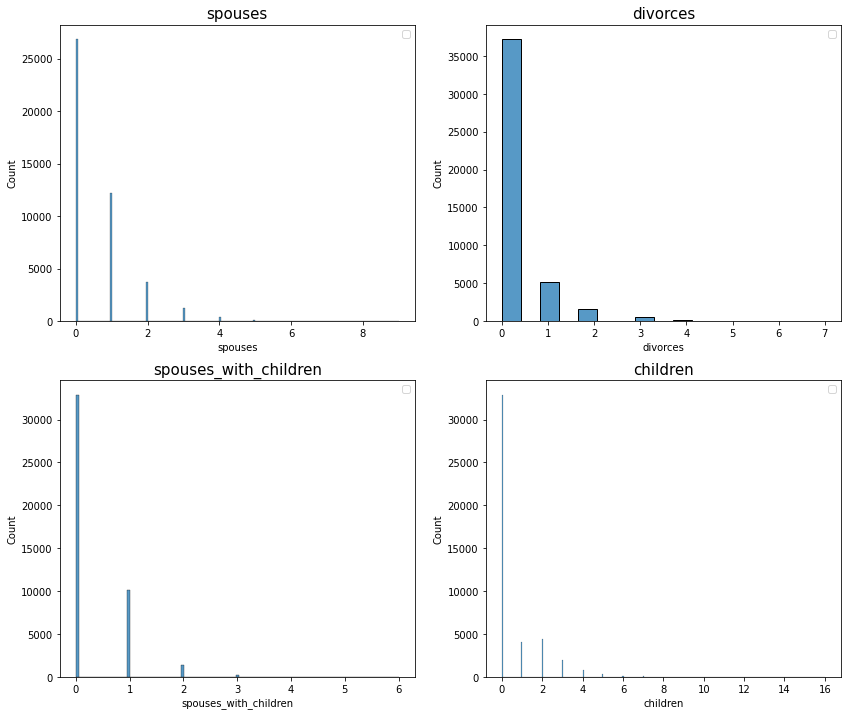

In [7]:
numerical_data = [ 
    "spouses", "divorces", "spouses_with_children", "children"
]


utils.plot_histplot_matrix(df_filtered, numerical_data)

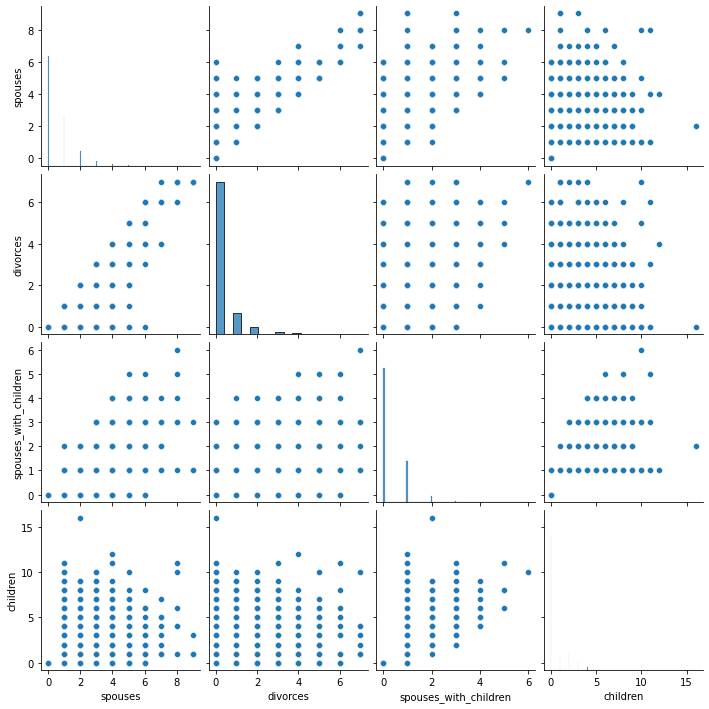

In [8]:
# Матрица графиков рассеивания

sns.pairplot(df_filtered[["spouses", "divorces", "spouses_with_children", "children"]])

In [9]:
np.corrcoef(df_filtered["spouses"], df_filtered["spouses_with_children"])[0, 1]

0.7144760966833218

In [10]:
np.corrcoef(df_filtered["children"], df_filtered["divorces"])[0, 1]

0.4117881302091161

In [12]:
df_filtered.corr()


,height,spouses,divorces,spouses_with_children,children
height,1.000000,0.001029,-0.020613,0.046351,0.069361
spouses,0.001029,1.000000,0.810577,0.714476,0.605811
divorces,-0.020613,0.810577,1.000000,0.529787,0.411788
spouses_with_children,0.046351,0.714476,0.529787,1.000000,0.872782
children,0.069361,0.605811,0.411788,0.872782,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


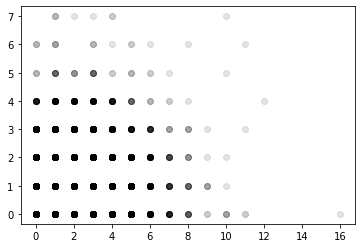

In [13]:
plt.scatter(df_filtered["children"],df_filtered["divorces"], c=(0,0,0,0.1) )